# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline
load_dotenv()


Bad key "text.kerning_factor" on line 4 in
C:\Users\derek\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


True

In [2]:
# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']

5255

In [5]:
# Fetch the Ethereum news articles

eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

1327

In [6]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
3,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...


In [9]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.281705,0.016700,0.898250,0.085000
std,0.350715,0.034697,0.081487,0.073806
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.835750,0.000000
50%,0.337550,0.000000,0.890000,0.086500
75%,0.554250,0.000000,1.000000,0.149000
max,0.801600,0.103000,1.000000,0.209000


In [10]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.075732,0.020421,0.940053,0.039526
std,0.218614,0.041156,0.072808,0.048314
min,-0.493900,0.000000,0.753000,0.000000
25%,0.000000,0.000000,0.892000,0.000000
50%,0.000000,0.000000,0.948000,0.000000
75%,0.177900,0.000000,1.000000,0.067000
max,0.526700,0.119000,1.000000,0.136000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin at 0.085

Q: Which coin had the highest compound score?

A: Bitcoin at .0816

Q. Which coin had the highest positive score?

A: Bitcoin at .209

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
    
    # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize Words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words

In [14]:
# Create a new tokens column for bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, 2020, come, close,..."
4,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,"[security, exchange, commission, plan, sue, ri..."


In [15]:
# Create a new tokens column for ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,"[security, exchange, commission, plan, sue, ri..."
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, derided, serious, investor, bubble, ..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representation, virtual, currenc..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, photo, representation, virtual, currenc..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

# Generate the Bitcoin N-grams where N=2
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

bigram_btc = bigram_counter(btc_tokens, 2)

In [18]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('char', 20),
 ('bitcoin', 14),
 ('reuters', 9),
 ('2020', 7),
 ('cryptocurrency', 6),
 ('november', 5),
 ('year', 5),
 ('currency', 5),
 ('illustration', 5),
 ('alltime', 4)]

In [21]:
# Get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 19),
 ('bitcoin', 14),
 ('reuters', 13),
 ('taken', 11),
 ('photo', 10),
 ('cryptocurrency', 8),
 ('representation', 8),
 ('virtual', 8),
 ('currency', 8),
 ('illustration', 8)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

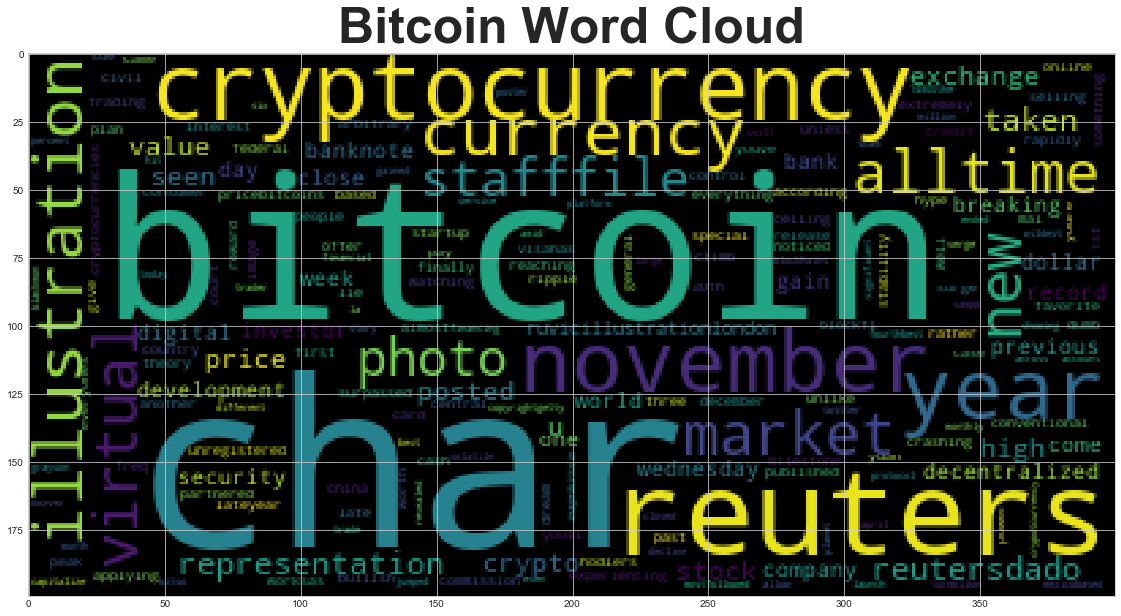

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

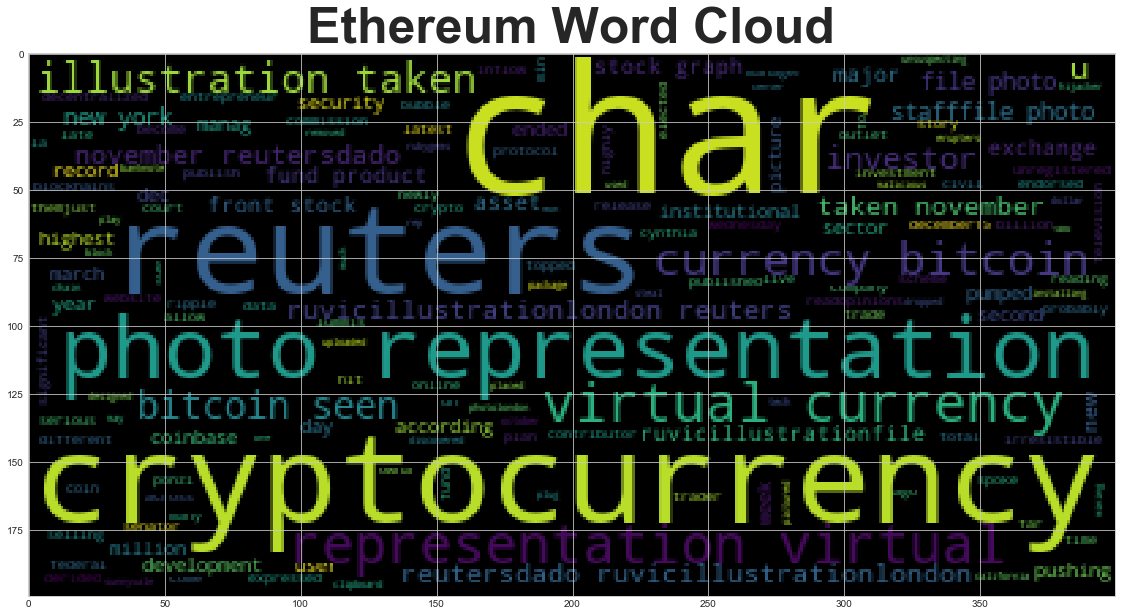

In [36]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [37]:
import spacy
from spacy import displacy

In [38]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [39]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [40]:
# Concatenate all of the bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [41]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [42]:
# Render the visualization
displacy.render(doc, style='ent')

In [43]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
The Securities and Exchange Commission ORG
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
6 CARDINAL
6 CARDINAL
one CARDINAL
above $20,000 MONEY
Wednesday DATE
a year DATE
Reuters ORG
Bitcoin GPE
U.S. GPE
January 6, 2020 DATE
REUTERS/ ORG
Dado Ruvic/File Photo ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS

---

## Ethereum NER

In [44]:
# Concatenate all of the bitcoin text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [45]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [46]:
# Render the visualization
displacy.render(doc, style='ent')

In [47]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

The Securities and Exchange Commission ORG
Bitcoin GPE
this year DATE
Wednesday DATE
bitcoin GPE
20,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$5.6 billion MONEY
this year DATE
more than 600% PERCENT
2019 DATE
Coin ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
